# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [102]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
df.head(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
df.tail(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [6]:
df.sample(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1845,EXT1846,58,Professional,Mobile App,High,2,1996,2.269,Email Activity,No,Yes,No,Yes,Yes,1
1324,EXT1325,45,Unemployed,Mobile App,Medium,6,292,0.159,Email Activity,No,No,No,No,No,0
3793,EXT3794,53,Unemployed,Website,High,1,301,3.260,Phone Activity,No,No,No,No,No,1
3966,EXT3967,22,Student,Mobile App,High,1,116,2.223,Phone Activity,No,Yes,No,Yes,No,0
2915,EXT2916,59,Professional,Mobile App,Medium,1,1911,4.383,Email Activity,No,No,No,No,No,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [9]:
print(f"The number of rows in the table is: {df.shape[0]}")
print(f'The number of columns in the dataset is: {df.shape[1]}')

The number of rows in the table is: 4612
The number of columns in the dataset is: 15


From the intial data overiew, it appears like the dataset has a mix of categorical and numerical data about the customers from ExtraaLearn. Before removing duplicates (if they are there), 4612 rows of data exist with data spread across 15 columns. The last column in the table 'status' will be the Y variable that we are trying to predict through the classification exercise. We also understand that there are no null values in the dataset, however there could be extreme outliers (EX:-99999) which often constitutes a missing value. From the describe table we can infer that its pretty unlikely that extreme outliers mark missing values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [10]:
#Deleting ID because it will not be helpful for the model
df.drop('ID', axis=1,inplace=True)

In [11]:
#Ensuring the deletion was successful, ID should not be present
print(df.columns)

Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')


In [12]:
#There are no null values --> There could be extreme outliers that signal that they are null values
df.isnull().sum()

,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0
print_media_type2,0


In [13]:
''''We can see here that for the numerical values that the table gives us the min and max values for each feature.
    Age: The range of values makes sense 18-63
    website_visits: The range of 0-30 makes sense
    time_spent_on_website: The range from 0 to ~40 hours makes sense, I have propably spend ~40 hours on the olympus website
    pages_views_per_visit: The range of 0- ~18 makes sense
    status: is a binary feature so 0 and 1 make sense
    '''
#There are no extreme outliers that signal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [14]:
#There is no duplicated data
df.duplicated(keep='first').sum()

np.int64(14)

In [16]:
numerical_variables = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
for col in numerical_variables:
  z_scores = np.abs(stats.zscore(df[col]))
  outliers = df[z_scores>3]
  print(f"Column: {col} → {len(outliers)} outliers")

Column: age → 0 outliers
Column: website_visits → 66 outliers
Column: time_spent_on_website → 0 outliers
Column: page_views_per_visit → 40 outliers


In [17]:
#The oultier values make sense, maybe the individuals were flipping between pages or doing multiple projects in one visit
df[df['page_views_per_visit'] > df['page_views_per_visit'].quantile(0.99)]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
199,36,Unemployed,Mobile App,Medium,4,2365,8.714,Email Activity,No,No,No,No,No,0
227,48,Unemployed,Website,Medium,2,1942,13.076,Phone Activity,No,No,No,Yes,No,0
268,57,Professional,Mobile App,Medium,3,1009,18.302,Phone Activity,No,No,No,No,No,0
338,54,Unemployed,Mobile App,High,5,1899,8.768,Email Activity,No,No,No,No,No,0
472,24,Student,Mobile App,High,1,1661,9.100,Email Activity,Yes,No,Yes,Yes,No,0
1045,60,Professional,Website,Medium,16,2072,9.058,Email Activity,Yes,No,Yes,Yes,No,1
1088,58,Unemployed,Mobile App,Medium,9,299,8.858,Phone Activity,No,No,Yes,No,No,0
1119,25,Professional,Mobile App,Medium,1,1240,11.739,Website Activity,No,No,No,No,No,0


In [18]:
#Looking at the values that are extreme for website visits
#it is possible that people spent this much time on the website, although it might be unlikely
df[df['website_visits'] > df['website_visits'].quantile(0.99)]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
66,59,Unemployed,Mobile App,Medium,25,311,2.184,Phone Activity,No,No,Yes,No,No,0
201,57,Professional,Mobile App,High,14,66,2.043,Email Activity,No,No,No,Yes,No,0
381,60,Professional,Website,Medium,14,238,2.201,Email Activity,Yes,No,No,No,No,0
417,59,Professional,Website,High,14,1799,5.301,Email Activity,No,No,No,No,No,1
452,24,Student,Mobile App,Low,24,137,6.814,Email Activity,No,No,No,No,No,0
479,60,Professional,Mobile App,Medium,15,2042,3.003,Email Activity,No,No,Yes,No,No,0
509,24,Student,Mobile App,Medium,30,388,3.566,Website Activity,No,No,No,No,No,0
585,26,Professional,Mobile App,Medium,14,468,1.898,Phone Activity,No,No,Yes,No,No,0
655,54,Professional,Website,High,14,419,2.169,Website Activity,No,No,No,No,No,1
827,53,Professional,Website,Medium,14,212,2.037,Website Activity,No,No,No,No,No,1


## EDA

- It is a good idea to explore the data once again after manipulating it.

### Numerical Univariate Analysis

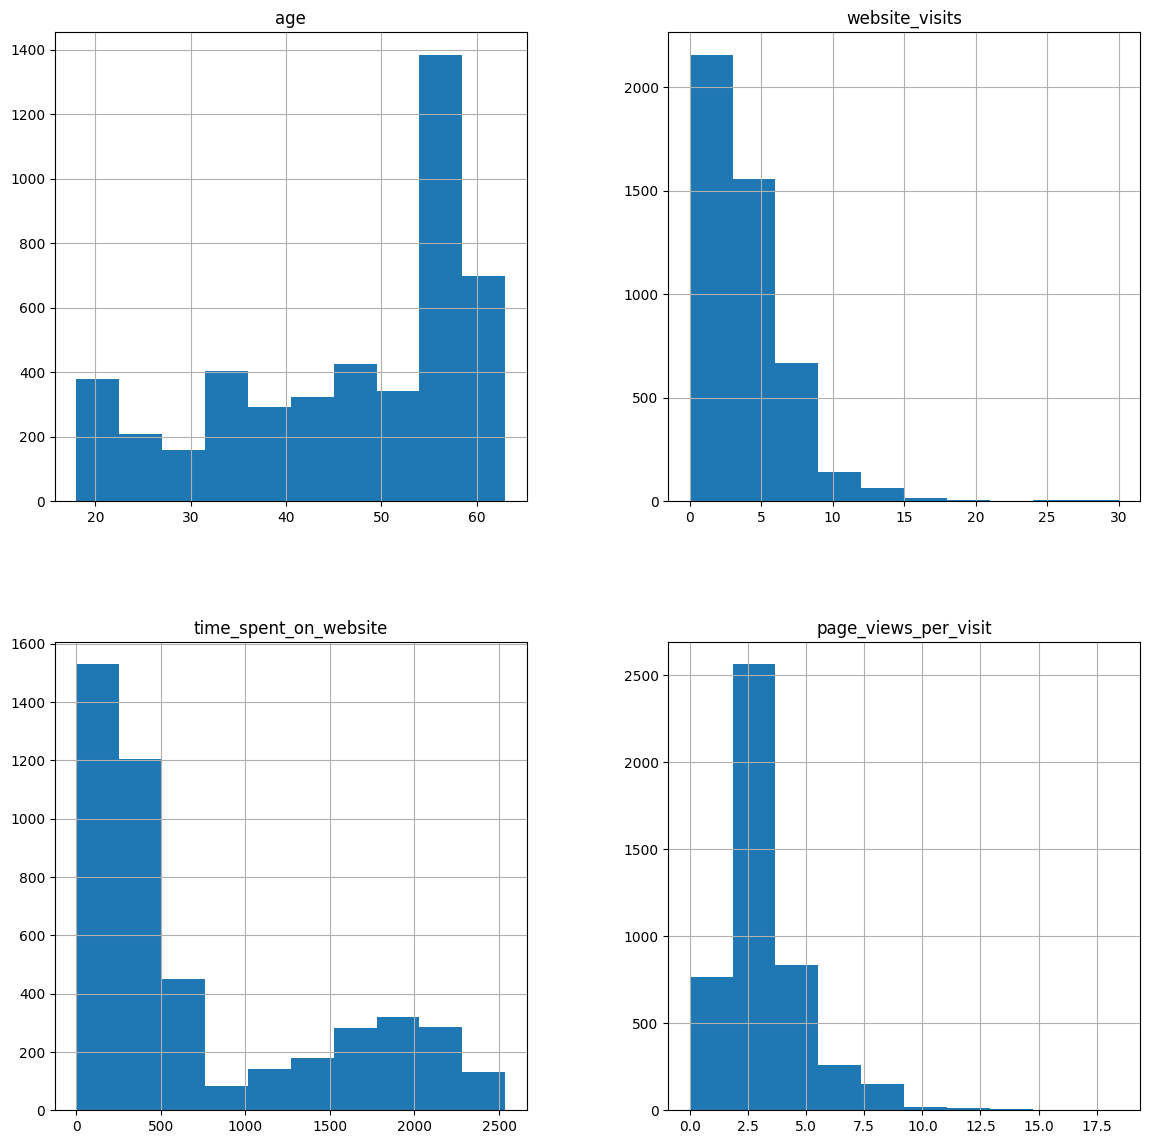

In [21]:

df[numerical_variables].hist(figsize=(14,14))
plt.show()

- Age: This variable is skewed left with the majority of the individuals being over 50 years old. Ages below 50 are relatively uniform.
- website_visits: Heavily right skewed with most people visiting under 5 website visits
- time_spent_on_website: Right skewed with a mass of values over ~1700. Shows that most poeple either spend little to no time on the webiste or spend a lot of time, there isn't a lot of values in between.
- page_views_per_visit: somewhat normally distributed arounf 2.5. Some extreme outliers around 12-15

These features all look like they have variation and could potentially explain Y.

###Categorial Univariate Analysis

In [20]:
categorical_variables = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1',	'print_media_type2',	'digital_media',	'educational_channels',	'referral', 'status']
for col in categorical_variables:
  print(df[col].value_counts()/len(df[col])*100)
  print()

current_occupation
Professional    56.721596
Unemployed      31.244579
Student         12.033825
Name: count, dtype: float64

first_interaction
Website       55.117086
Mobile App    44.882914
Name: count, dtype: float64

profile_completed
High      49.089332
Medium    48.590633
Low        2.320035
Name: count, dtype: float64

last_activity
Email Activity      49.392888
Phone Activity      26.756288
Website Activity    23.850824
Name: count, dtype: float64

print_media_type1
No     89.223764
Yes    10.776236
Name: count, dtype: float64

print_media_type2
No     94.947962
Yes     5.052038
Name: count, dtype: float64

digital_media
No     88.573287
Yes    11.426713
Name: count, dtype: float64

educational_channels
No     84.71379
Yes    15.28621
Name: count, dtype: float64

referral
No     97.983521
Yes     2.016479
Name: count, dtype: float64

status
0    70.143105
1    29.856895
Name: count, dtype: float64



VALUE COUNTS:
- current_occupation: most users are professionals, followed by unemployed, with students being the smallest group
- first_interaction: a slight majority of users first interacted via the webiste, while the rest is Mobile App
- profile_completed: nearly all users have high or medium.
- last_activity: the most common last activity is Email, followed by Phone activity, and webiste activity
- print_media_type1/2 and digital media, educational channels: majority don't interact with these
- referral: very few user came through referrals, compared 98% who did not
- status: about 30% converted while 70% didn't.

### Bivariate categorical analysis

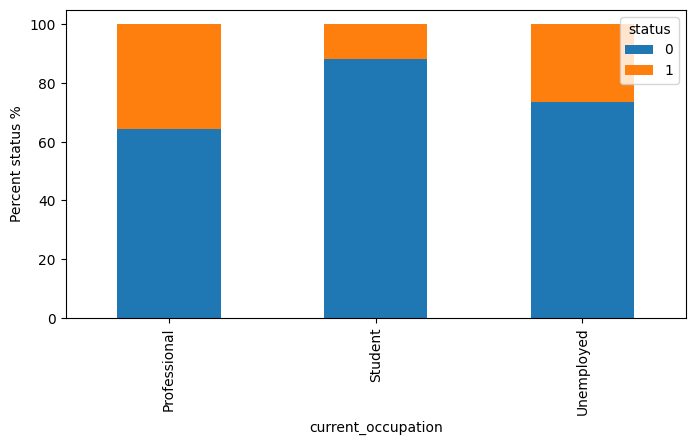

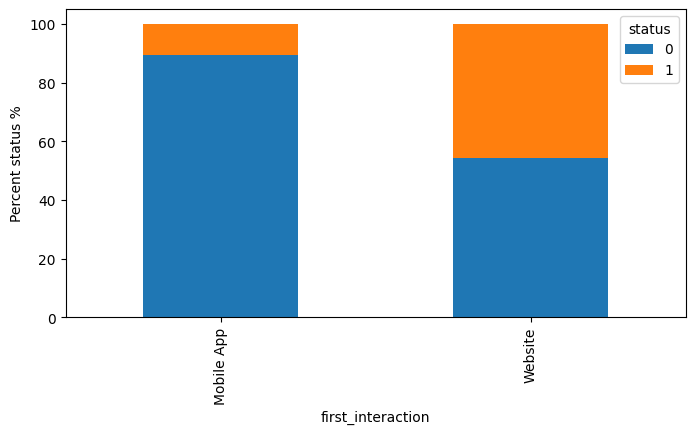

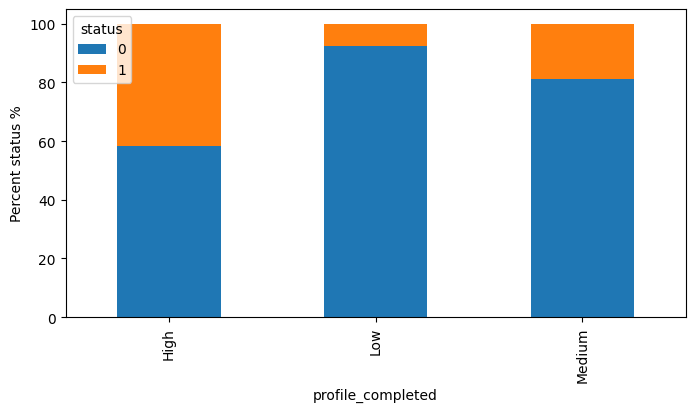

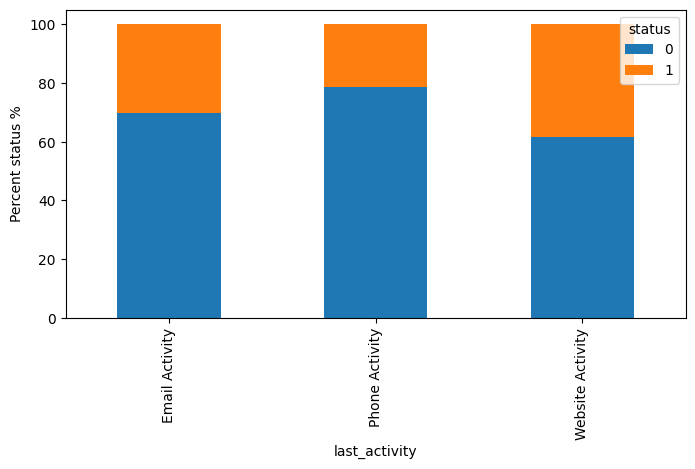

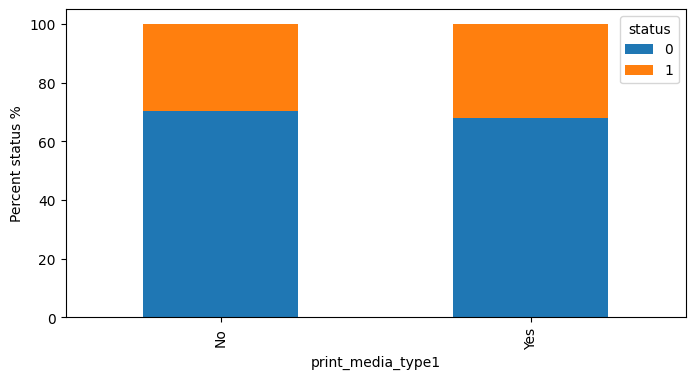

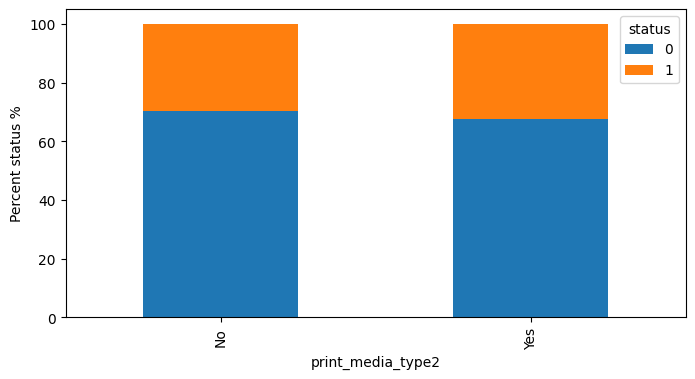

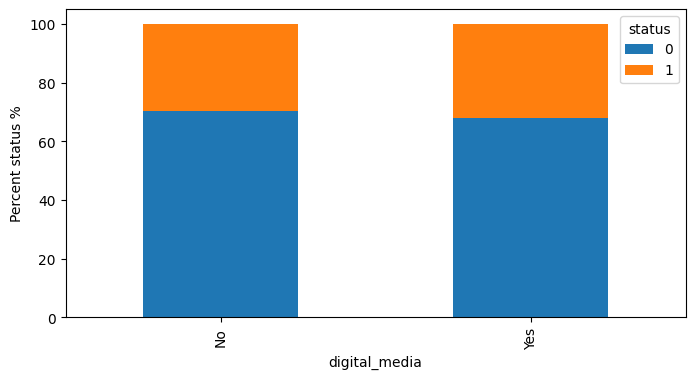

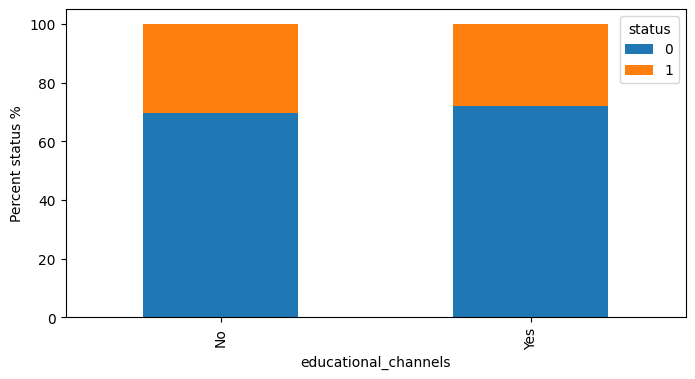

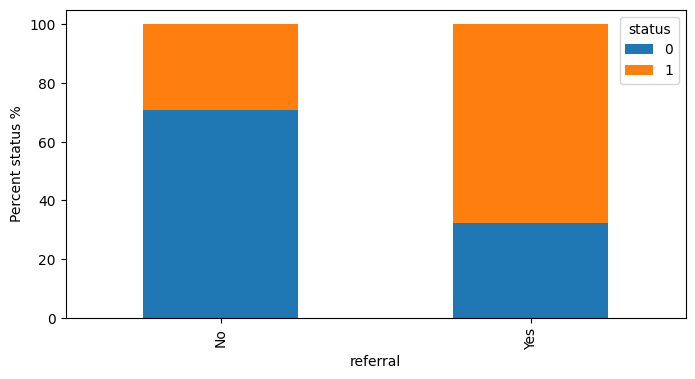

In [22]:
for col in categorical_variables:
  if col!='status':
    (pd.crosstab(df[col], df['status'], normalize='index')*100).plot(kind='bar', figsize=(8,4),stacked=True)
    plt.ylabel('Percent status %')




* current_occupation: Students are less likely to become a paid member which makes sense since they probably make less money. Unemployed and professionals are relatively similar in percent status, but professional is slightly higher which is likely due to them have disposable income.
* first_interaction: There is a stark difference with almost half of the people that visited the webiste first becoing a paying member. Most people on mobile app did not convert. This could be due to a differece in UI, accessibilty on the website.
* profile_completed:  The more you filled out your profile the more likely you were to become a paid member. This relationship could exist because people who are putting more time into extrenous thing(profile building), might be more invested in the platform and therefore be likelly to pay.
* The variation in status is not explained greatly by this feature. Website activity is slightly higher but that relationship already exists in first_interaction.
* print_media_1/2,digital_media/education_channels: These columns have almost the exact same value and therefore will likely be deleted because there is no explanation of the variation in status.
* referral explains status very well. People who were referred were much more likley to pay for the platform's service.


### Bivariate numerical analysis


In [23]:
#Checking aggregated means
df.groupby(['status'])[numerical_variables].mean().T

status,0,1
age,45.153014,48.663762
website_visits,3.578980,3.538126
time_spent_on_website,577.420711,1068.397967
page_views_per_visit,3.025732,3.027050


* Time spent on the website is a great predictor for if a individual pays or doesn't. It seems like the more time spend on the website, the more likely an individual is to pay.
* Age is also another good variable to explain status. It seems like older people are more likely to pay, this could be due to having mroe disposible income the older you are. Could this an exmaple of mulitcollinearity?
* Page views per visit and website visits are poor predictors due to their lack of variation between 0 and 1.

<Axes: >

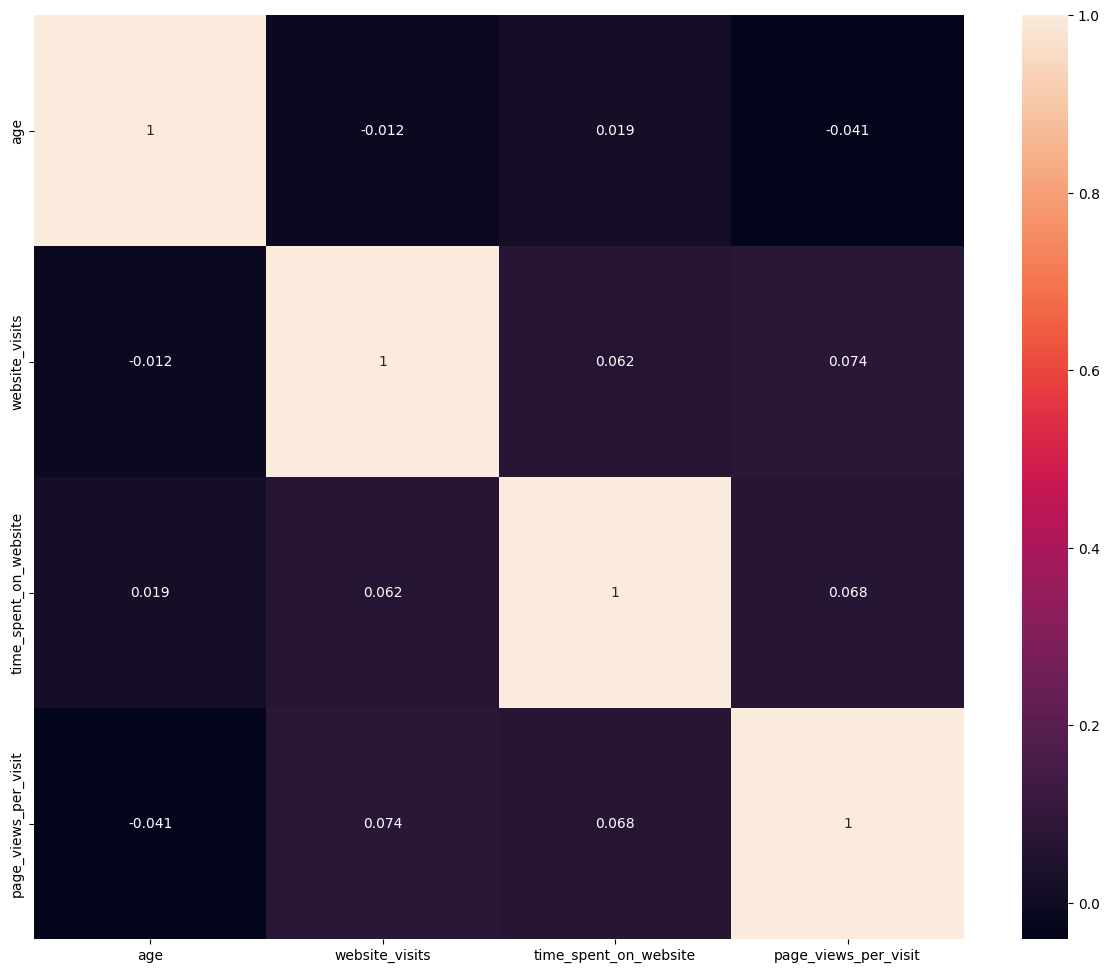

In [24]:
#HEATMAP
plt.figure(figsize=(15,12))
sns.heatmap(df[numerical_variables].corr(), annot=True)

There are no strong correlations between the numerical variables

### One Hot Encoding


In [48]:
#one hot encoding for cat vars
df_encoded=pd.get_dummies(df, columns=categorical_variables[:-2], drop_first=True)

for col in df_encoded.select_dtypes(include='bool').columns:
  df_encoded[col] =df_encoded[col].astype(int)

referral_mapping={
    'No':0,
    'Yes':1
}

df_encoded['referral'] = df_encoded['referral'].map(referral_mapping)


In [49]:
df_encoded.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes
0,57,7,1639,1.861,0,1,0,1,1,0,0,0,1,1,0,1,0
1,56,2,83,0.320,0,0,0,0,0,0,1,0,1,0,0,0,1
2,52,3,330,0.074,0,0,0,0,1,0,1,0,1,0,0,1,0
3,53,4,464,2.057,0,1,0,1,1,0,0,0,1,0,0,0,0
4,23,4,600,16.914,0,0,1,0,1,0,0,0,0,0,0,0,0


## Building a Decision Tree model

In [50]:
#Splitting Data
x= df_encoded.drop('status', axis=1)
y=df_encoded['status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42, stratify=y)

In [51]:
dt= DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [28]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted))
  cm=confusion_matrix(actual, predicted)
  plt.figure(figsize=(8,5))

  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['0', '1'], yticklabels=['0','1'])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



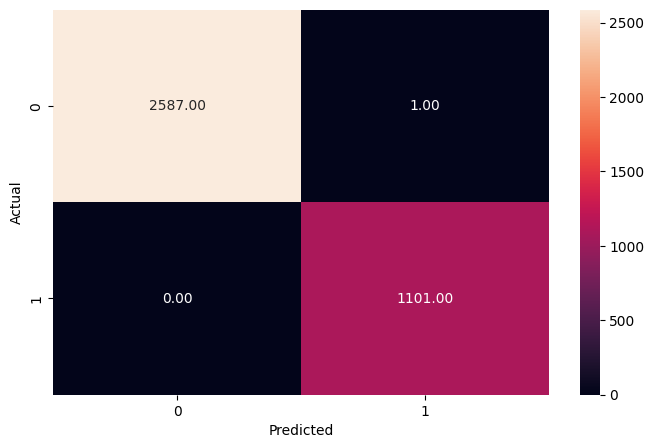

In [55]:
y_train_pred = dt.predict(x_train)

metrics_score(y_train, y_train_pred)


* The decision tree is giving me a 100% score for all metrics on the training data even though there is one false positive

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       647
           1       0.72      0.68      0.70       276

    accuracy                           0.82       923
   macro avg       0.79      0.78      0.79       923
weighted avg       0.82      0.82      0.82       923



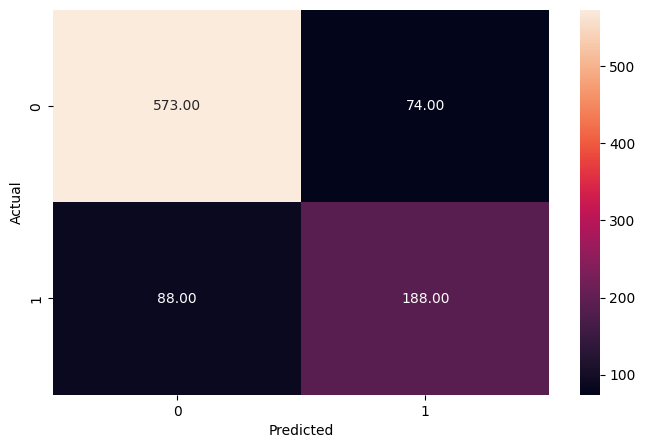

In [58]:
y_test_pred = dt.predict(x_test)

metrics_score(y_test, y_test_pred)

* The DT worked very well on the training data but not so well on the testing data since the recall is less than .8 when compared to 1 on the training data.
* The DT is overfitting the training data
* The precision on the test data suggests there is a 28% chance that the model will predict that is person will start paying for the service when they wouldn't. The company may overestimate the amount of money they will make in a given period of time which could have adverse effects on the company long-term.
* The model is predicting 0s much better than 1s. When predicting 1s incorrectly has a worse effect on the company.

<Axes: xlabel='Importance', ylabel='None'>

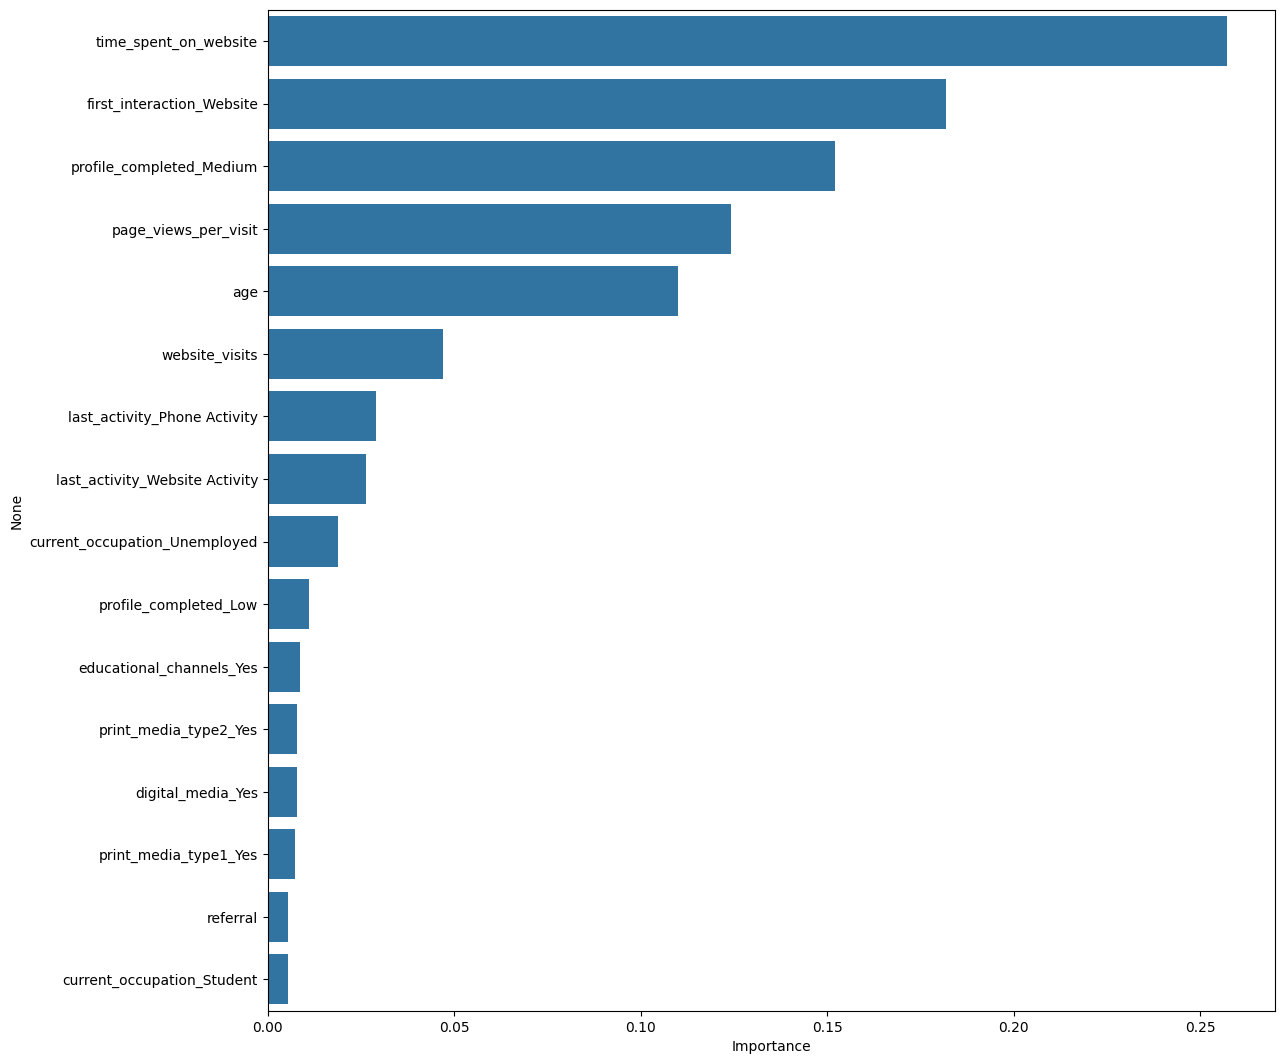

In [60]:

importances = dt.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

* It appears that time_on_website, if the first interaction was a website, and profile completed medium are the three most important features for predicting status.

## Do we need to prune the tree?

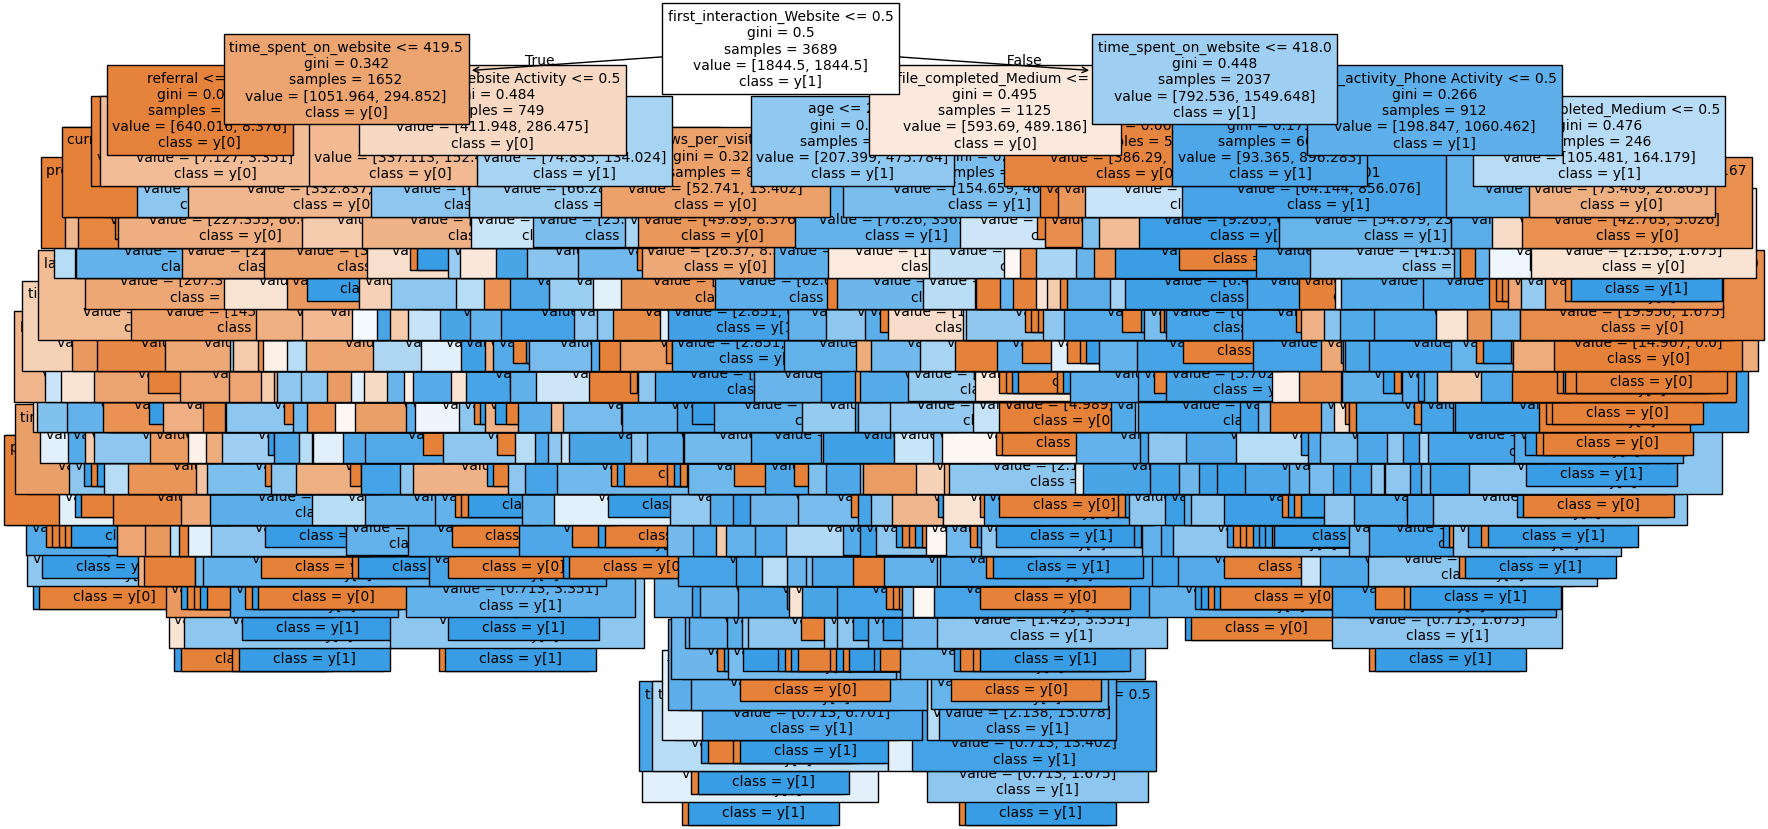

In [79]:
#printing the decision tree...definetely needs pruning
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True, feature_names=x.columns, class_names=True, fontsize=10)
plt.show()

In [61]:
#getting possible alphas
path = dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 3.86089924e-19 5.79134885e-19 6.00584326e-19
 6.86382086e-19 6.86382086e-19 9.43775369e-19 9.65224809e-19
 1.67305634e-18 1.73740466e-18 1.93044962e-18 1.93044962e-18
 1.93044962e-18 1.97334850e-18 2.25219122e-18 2.89567443e-18
 3.86089924e-18 3.86089924e-18 4.11829252e-18 4.46148356e-18
 6.75657366e-18 7.86534023e-18 1.15826977e-17 1.73096982e-17
 2.02697210e-17 2.31653954e-17 3.08871939e-17 6.51633993e-17
 1.53149622e-05 1.76348577e-05 1.20271814e-04 1.23024756e-04
 1.24003743e-04 1.25247364e-04 1.48676987e-04 1.69204738e-04
 1.69204738e-04 1.69204738e-04 1.69204738e-04 1.74626735e-04
 1.74626735e-04 1.74626735e-04 1.78049996e-04 1.78049996e-04
 1.78049996e-04 1.78049996e-04 1.82130405e-04 1.82130405e-04
 1.82130405e-04 1.83444164e-04 1.83444164e-04 1.83444164e-04
 1.83527047e-04 1.84244517e-04 1.85315592e-04 1.85315592e-04
 1.85315592e-04 1.86005614e-04 1.86005614e-04 1.86009213e-04
 1.86584569e-04 1.89175384e-04 1.89834370e-04 1.90541638e-04
 2.11113216e-04 2.116004

In [78]:
#iterating over alphas to determine the best accuracy scores
clfs=[]
for alpha in ccp_alphas:
  clf= DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
  clf.fit(x_train, y_train)
  clfs.append(clf)

test_scores = [accuracy_score(y_test, clf.predict(x_test)) for clf in clfs]

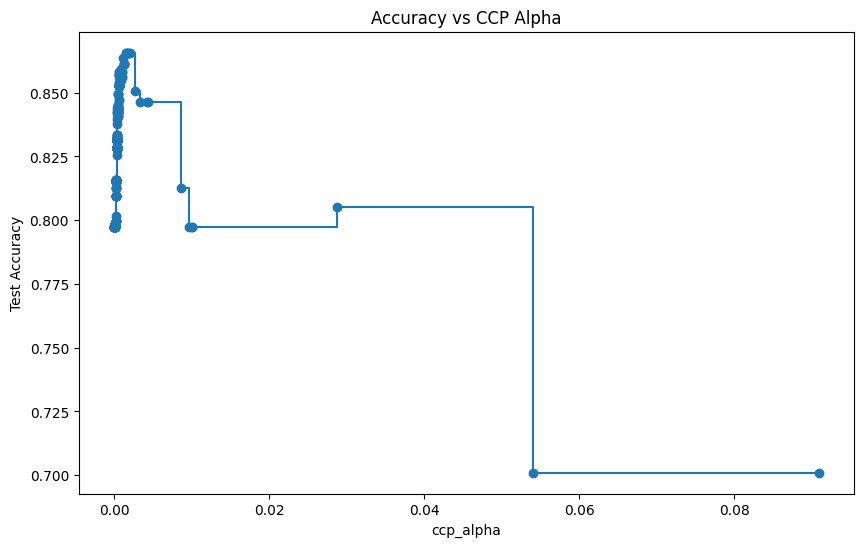

In [68]:
#Showing a graph to visualize the accuracy vs all the alphas
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, test_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.show()

* Appears that alphas are around .0015 are the best alphas as the graph spiked around x=.0015.

In [69]:
#finding the best alpha value by using accuracy score
best_index = test_scores.index(max(test_scores))


best_alpha = ccp_alphas[best_index]

print(f"Best alpha: {best_alpha}")
print(f"Max test accuracy: {test_scores[best_index]}")

Best alpha: 0.0015073370225447236
Max test accuracy: 0.8656554712892741


In [75]:
#making a pruned tree with the best alpha
best_alpha = best_alpha = ccp_alphas[test_scores.index(max(test_scores))]

pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_dt.fit(x_train, y_train)
y_test_pruned=pruned_dt.predict(x_test)

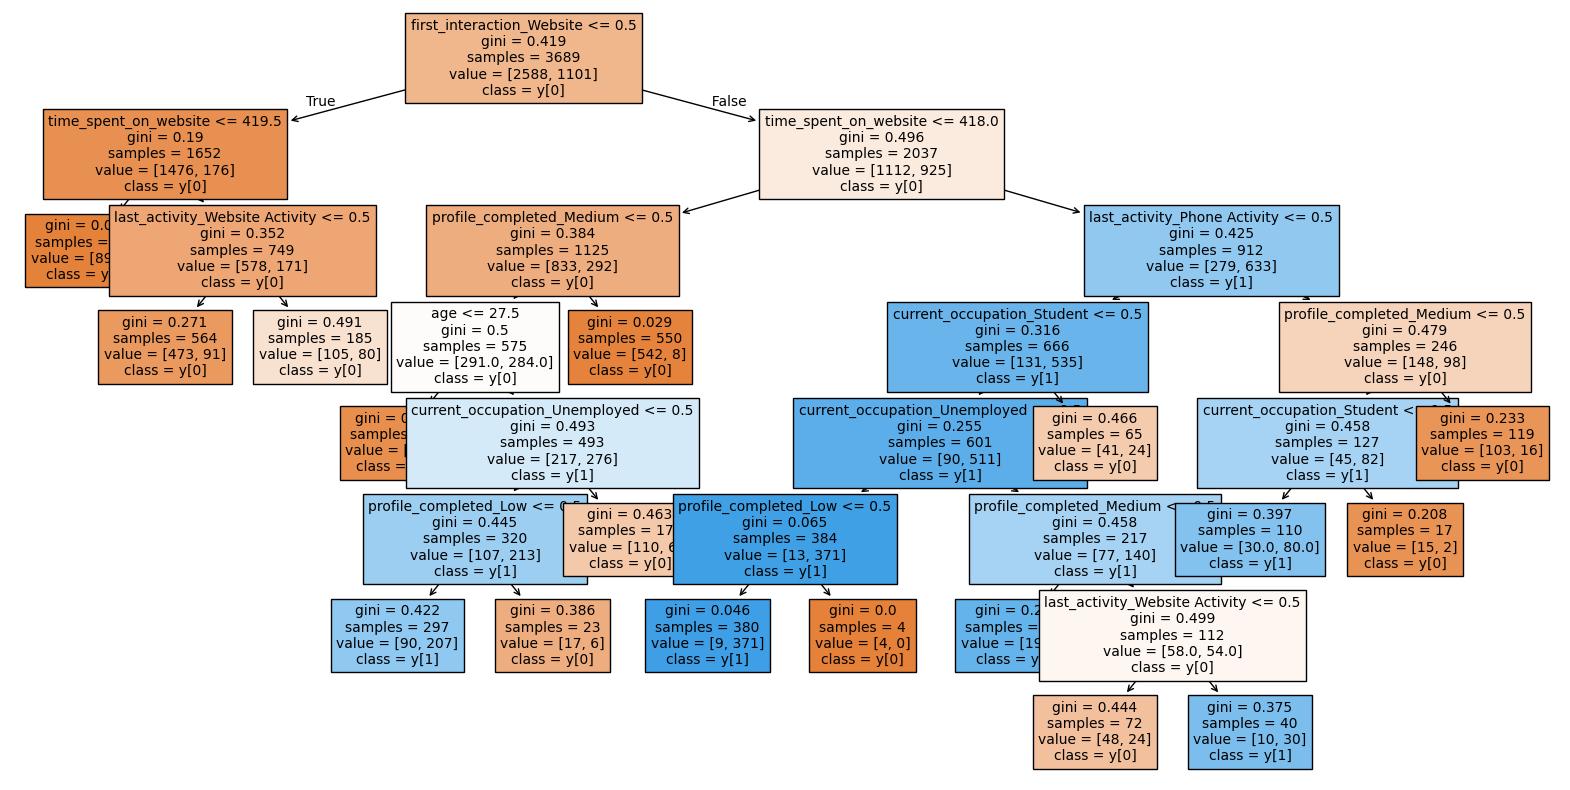

In [74]:
# plotting the new pruned tree
plt.figure(figsize=(20,10))
tree.plot_tree(pruned_dt, filled=True, feature_names=x.columns, class_names=True, fontsize=10)
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       647
           1       0.82      0.71      0.76       276

    accuracy                           0.87       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.87      0.86       923



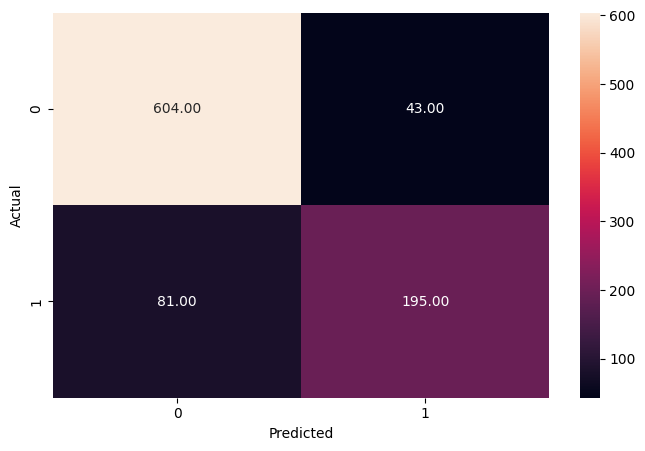

In [77]:
#getting the scores
metrics_score(y_test, y_test_pruned)

	*	Accuracy improved: from 0.82 → 0.87.
	*	Class 1 precision increased significantly: from 0.72 → 0.82 (fewer false positives predicting paying leads).
	*	Class 1 recall improved slightly: 0.68 → 0.71 (still some false negatives remain).
	*	Class 0 recall improved: 0.89 → 0.93 → better detection of non-paying leads.

## Building a Random Forest model

In [80]:
#making random forest model
rf= RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



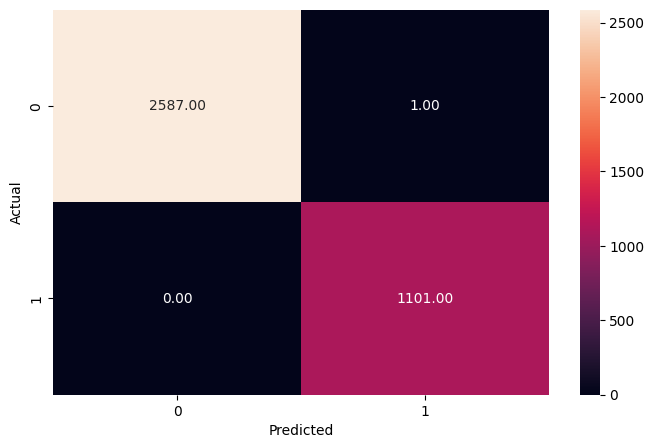

In [83]:
#training model and showing metrics
y_train_pred_rf = rf.predict(x_train)

metrics_score(y_train, y_train_pred_rf)

* For all the metrics, I get a 100% score

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       647
           1       0.80      0.70      0.75       276

    accuracy                           0.86       923
   macro avg       0.84      0.81      0.82       923
weighted avg       0.86      0.86      0.86       923



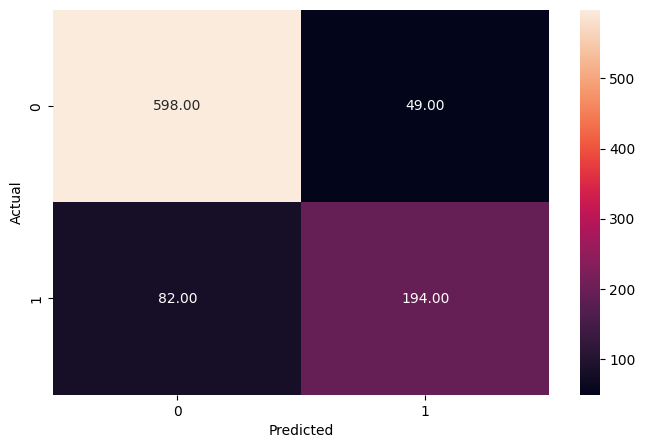

In [84]:
#testing the test data and showing metrics
y_pred_test_rf = rf.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

* The RF seems to be overfitting the training data since the recall is .81 for test data and it is 1 for training data.
* The RF seems to be better than the decision tree (before pruning)
* Recall for 1 is still too low

## Do we need to prune the tree?

In [107]:
#finding the best max depth and estimators
param_grid = {
    'max_depth': range(3, 21, 2),  # test depths 3, 5, 7, ..., 19
    'n_estimators': [None, 5, 10, 15, 20, 50, 100],          # you can vary this as well
    'max_features': ['sqrt', 'log2']
}

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best validation accuracy:", grid.best_score_)


Best parameters: {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 20}
Best validation accuracy: 0.8617544208006531


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       647
           1       0.82      0.75      0.78       276

    accuracy                           0.88       923
   macro avg       0.86      0.84      0.85       923
weighted avg       0.87      0.88      0.87       923



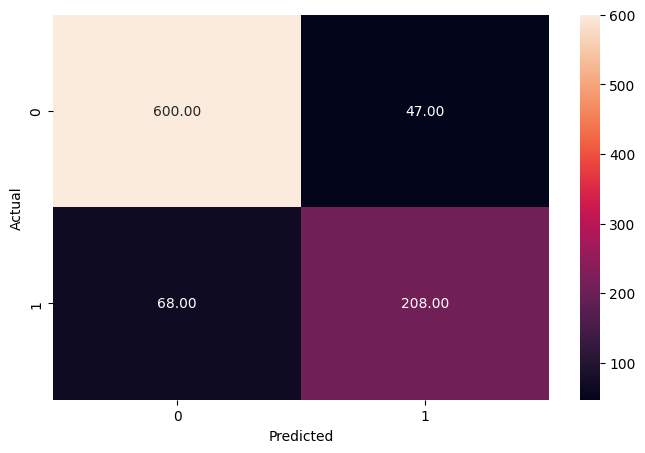

In [109]:

# Best parameters from your tuning
best_params = {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 20, 'random_state': 42}

# Initialize the Random Forest with best parameters
rf = RandomForestClassifier(**best_params)

# Fit on the training set
rf.fit(x_train, y_train)

# Predict on the test set
y_pred = rf.predict(x_test)

metrics_score(y_test, y_pred)

* Accuracy is 88%, meaning 88% of leads in the test were classified correctly
* Precision: Class 0's precision was 90%, meaning out of all the predicted non-converted leads, 90% were predicted correctly.
* Class 1: the precision for class 1 was lower at 82% which is better than our other models, but still not ideal. Some of the non-converted leads were being misclassified as false positives.
* Recall for class 0 was high at 93%, meaning few non-converted leads are being missed.
* The recall for class 1 was the lowest metric in the confusion matrix. Some of the converted leads are miscladdified as False Negatives.
* Class 0's F1-score is pretty high while class 1's is lower, indicating the model has more trouble predicting class 1 correctly.

## Actionable Insights and Recommendations

* Leads with higher engagement(more visits, longer time spend, more pages viewed) on the platform are more likely to convert
* Completing a medium to high percentage of the profile strongly affects the conversion rates
* Active interaction with representatives via email or phone increase the likelihood of conversion
* Digital ads and referral channels generate higher-quality leads than print media.
* Professionals and students show slightly higher conversion probabilities compared to unemployed leads.
* Allocate sales and marketing resources towards leads predicted to have a high conversion potential
* encourage profile completion and personalized engagement to nurture medium- and low intent leads effectively.